In [46]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc
project=pd.read_csv("/Users/neelamvinay/sem4/hypothyroid.csv")
print(project.info())#reading the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def metrics(y_true, y_pred_prob, threshold=0.5):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Other metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Sensitivity (Recall) and Specificity
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall (Sensitivity):", rec)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Confusion Matrix:")
    print(cm)

# Example usage
# Assuming you have y_true (true labels) and y_pred_prob (predicted probabilities) available
# y_true = ...
# y_pred_prob = ...
# metrics(y_true, y_pred_prob)

In [7]:
for i in list(project.columns):
    project[i] = project[i].apply(lambda x: np.nan if x=='?' else x)

In [8]:
print(project.head())

  age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U measured   T4U FTI measured  FTI TBG measured

In [9]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [10]:
cat_cols = project.select_dtypes(exclude='number').columns
cat_cols = list(cat_cols)

In [11]:
cat_cols=['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',

 'T3 measured',

 'TT4 measured',

 'T4U measured',

 'FTI measured',

 'TBG measured',

 'binaryClass']

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in cat_cols:
    project[i] = encoder.fit_transform(project[i])

In [13]:
project.head(15)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,SVHC,1
1,23,0,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,other,1
2,46,1,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,other,1
3,70,0,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,other,1
4,70,0,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,SVI,1
5,18,0,1,0,0,0,0,0,0,0,...,1,183,1,1.3,1,141,0,NaN,other,1
6,59,0,0,0,0,0,0,0,0,0,...,1,72,1,0.92,1,78,0,NaN,other,1
7,80,0,0,0,0,0,0,0,0,0,...,1,80,1,0.7,1,115,0,NaN,SVI,1
8,66,0,0,0,0,0,0,0,0,0,...,1,123,1,0.93,1,132,0,NaN,SVI,1
9,68,1,0,0,0,0,0,0,0,0,...,1,83,1,0.89,1,93,0,NaN,SVI,1


In [14]:
#finding missing values
project.isnull().sum()

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [15]:
project.head(20)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,NaN,SVHC,1
1,23,0,0,0,0,0,0,0,0,0,...,1,102,0,NaN,0,NaN,0,NaN,other,1
2,46,1,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,NaN,other,1
3,70,0,1,0,0,0,0,0,0,0,...,1,175,0,NaN,0,NaN,0,NaN,other,1
4,70,0,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,NaN,SVI,1
5,18,0,1,0,0,0,0,0,0,0,...,1,183,1,1.3,1,141,0,NaN,other,1
6,59,0,0,0,0,0,0,0,0,0,...,1,72,1,0.92,1,78,0,NaN,other,1
7,80,0,0,0,0,0,0,0,0,0,...,1,80,1,0.7,1,115,0,NaN,SVI,1
8,66,0,0,0,0,0,0,0,0,0,...,1,123,1,0.93,1,132,0,NaN,SVI,1
9,68,1,0,0,0,0,0,0,0,0,...,1,83,1,0.89,1,93,0,NaN,SVI,1


In [16]:

num_cols=['age', 'TSH','T3','TT4','T4U','FTI']
for i in num_cols:
    project[i] = project[i].astype(float)
    project[i] = project[i].fillna(project[i].mean())

In [17]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   int64  
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [18]:
project.to_csv('final.csv')

In [19]:


# Assuming df is your DataFrame and 'column_name' is the name of the column you want to remove
project.drop(columns=['TBG'],inplace=True)

In [20]:


# Assuming df is your DataFrame and 'column_name' is the name of the column you want to remove
project.drop(columns=['referral source'],inplace=True)

In [21]:
#dimensiions of the data set
print(project.shape)

(3772, 28)


In [22]:
#datatypes of the dataset
project.dtypes

age                          float64
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [23]:
X=project.iloc[:,0:-1]
Y=project["binaryClass"]

In [24]:
#converting the categorical values into numerical
ynew=pd.get_dummies(Y,drop_first=True).astype(int)
print(ynew)

      1
0     1
1     1
2     1
3     1
4     1
...  ..
3767  1
3768  1
3769  1
3770  1
3771  1

[3772 rows x 1 columns]


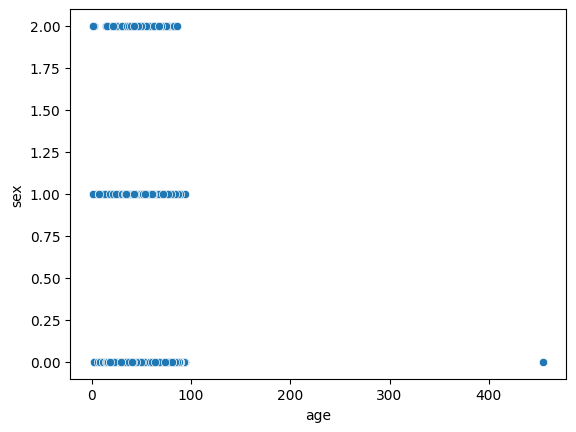

In [25]:
#scatter plot
sns.scatterplot(x='age',y='sex',data=project)
plt.show()

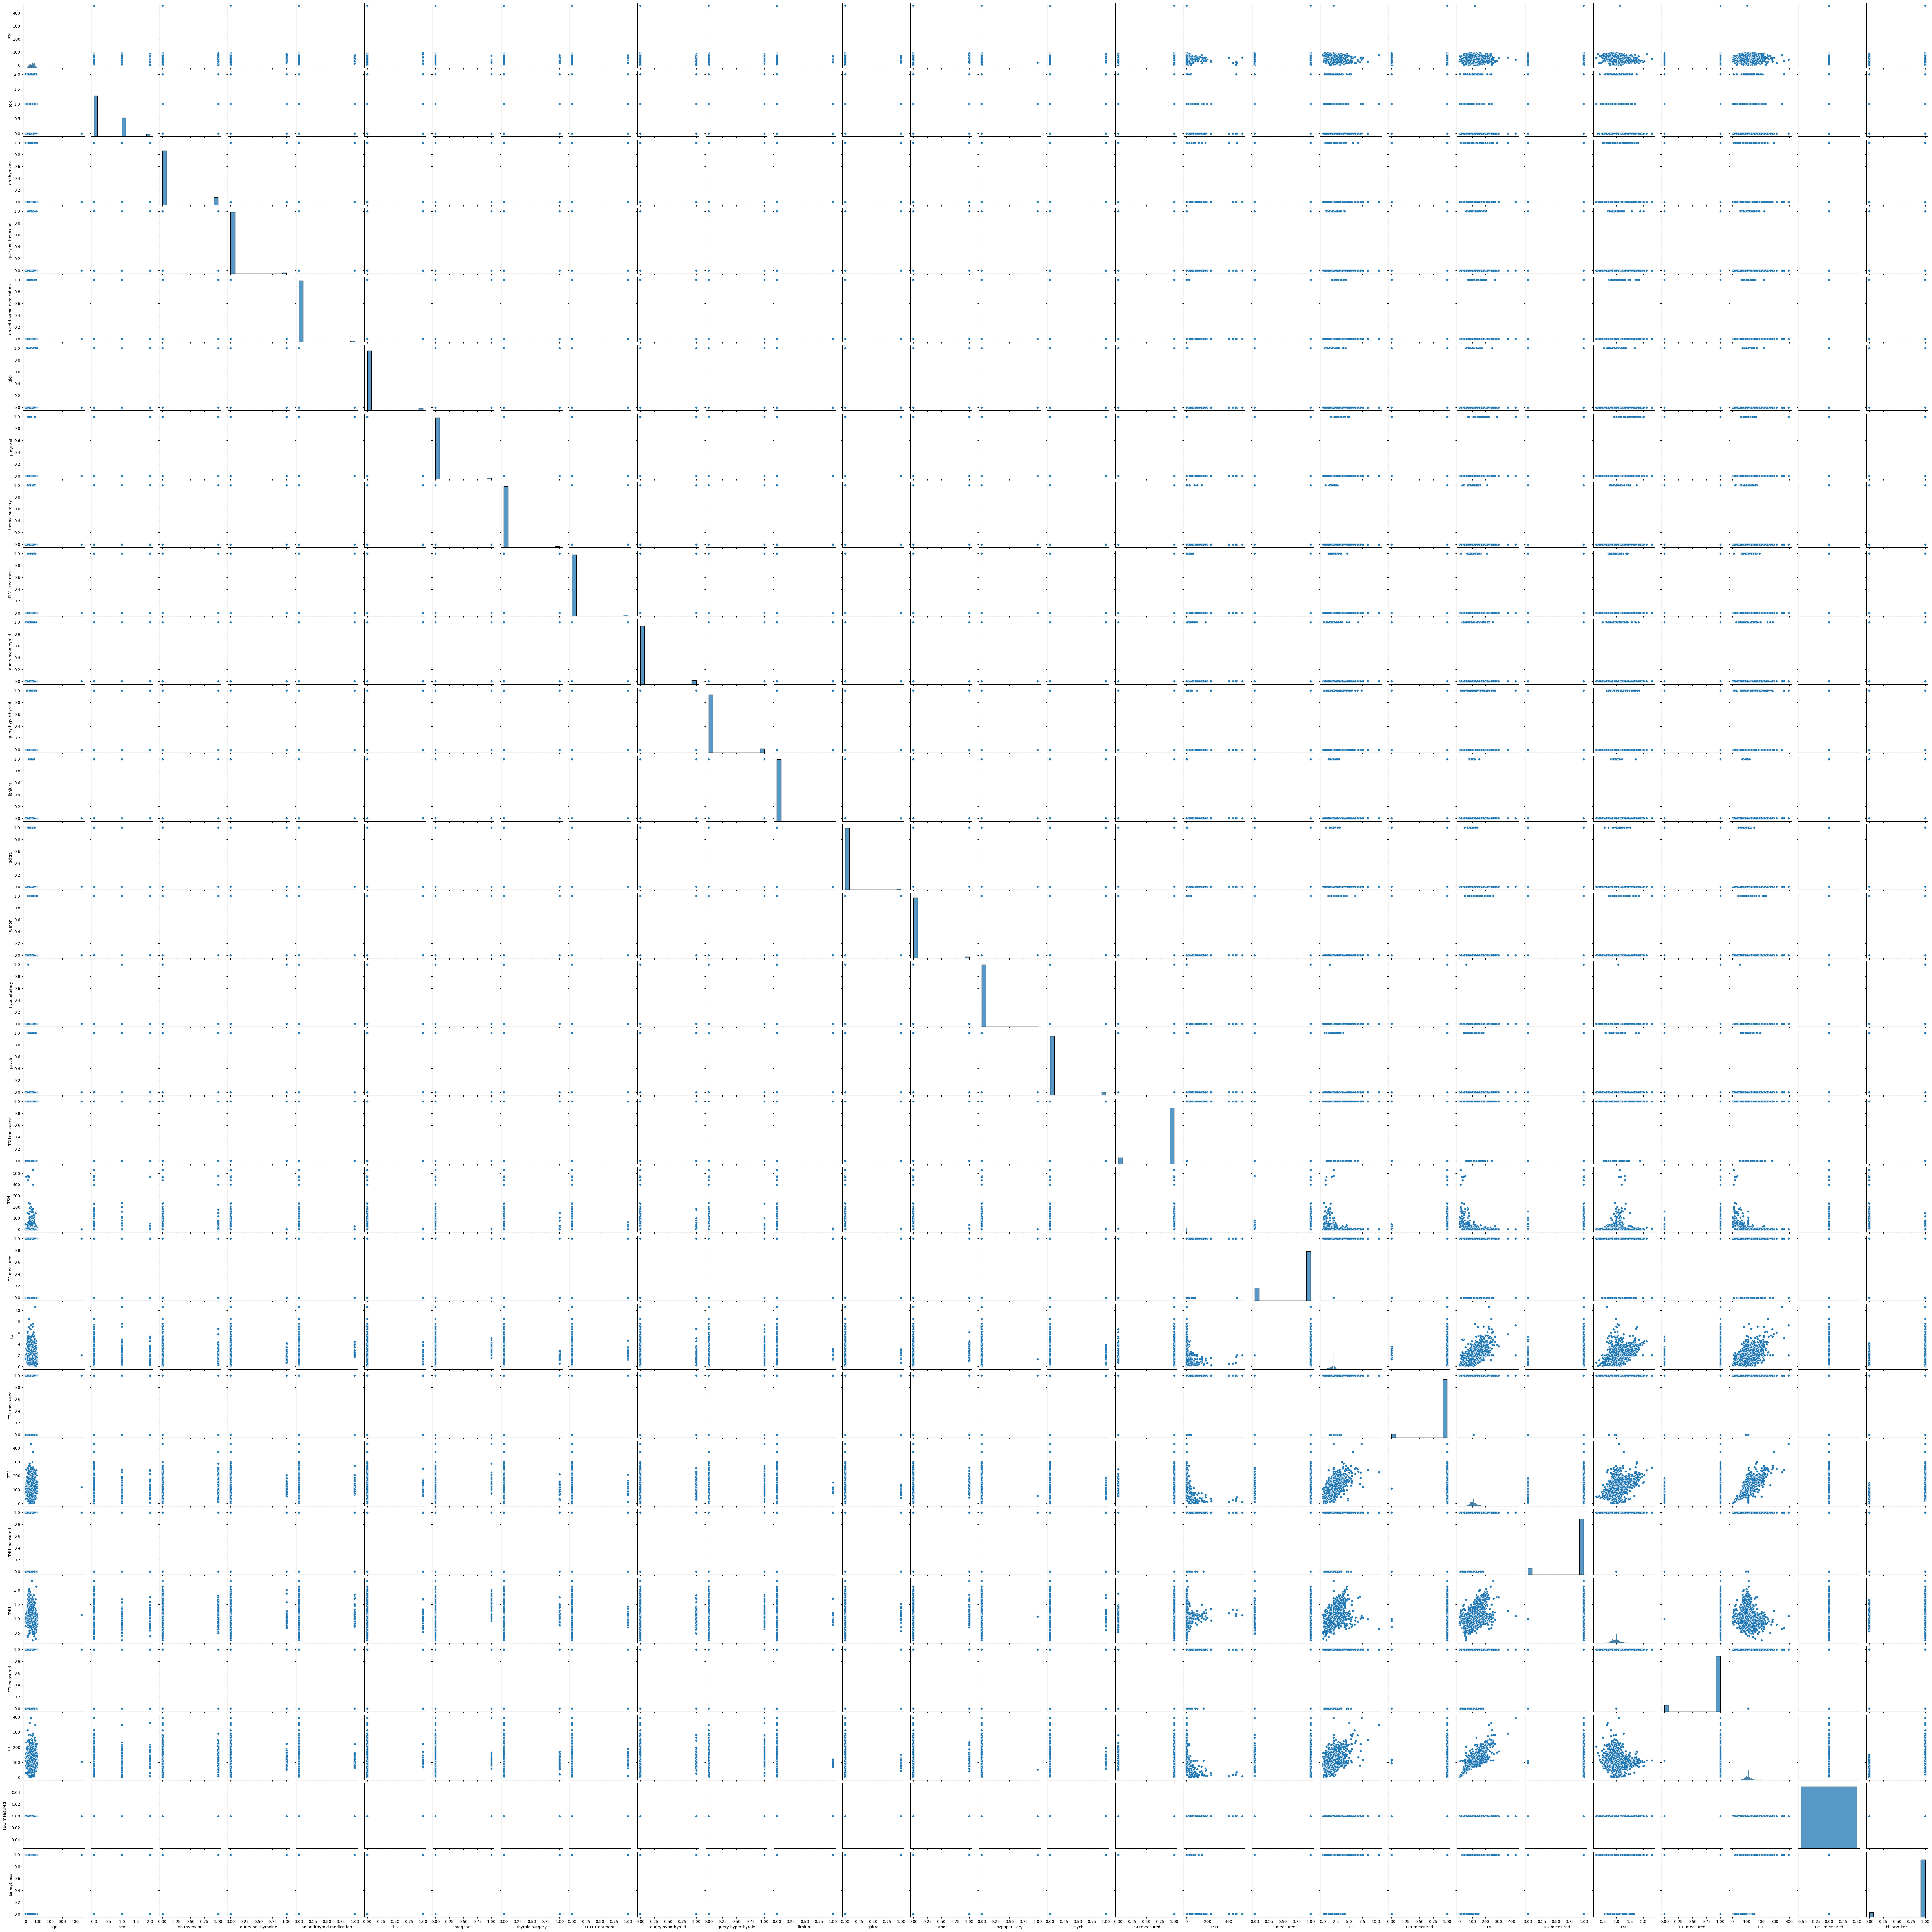

In [27]:
# #Pair plot
sns.pairplot(project)
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'on thyroxine'}>,
        <Axes: title={'center': 'query on thyroxine'}>,
        <Axes: title={'center': 'on antithyroid medication'}>],
       [<Axes: title={'center': 'sick'}>,
        <Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'thyroid surgery'}>,
        <Axes: title={'center': 'I131 treatment'}>,
        <Axes: title={'center': 'query hypothyroid'}>],
       [<Axes: title={'center': 'query hyperthyroid'}>,
        <Axes: title={'center': 'lithium'}>,
        <Axes: title={'center': 'goitre'}>,
        <Axes: title={'center': 'tumor'}>,
        <Axes: title={'center': 'hypopituitary'}>],
       [<Axes: title={'center': 'psych'}>,
        <Axes: title={'center': 'TSH measured'}>,
        <Axes: title={'center': 'TSH'}>,
        <Axes: title={'center': 'T3 measured'}>,
        <Axes: title={'center': 'T3'}>],
       [<Axes: title={'center': 'TT4 measur

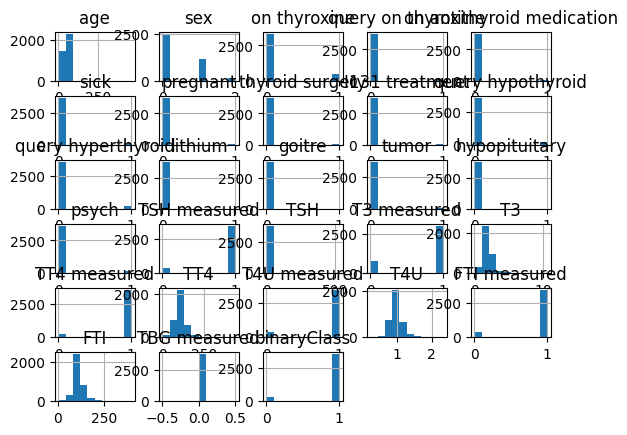

In [29]:
#histogram
project.hist()

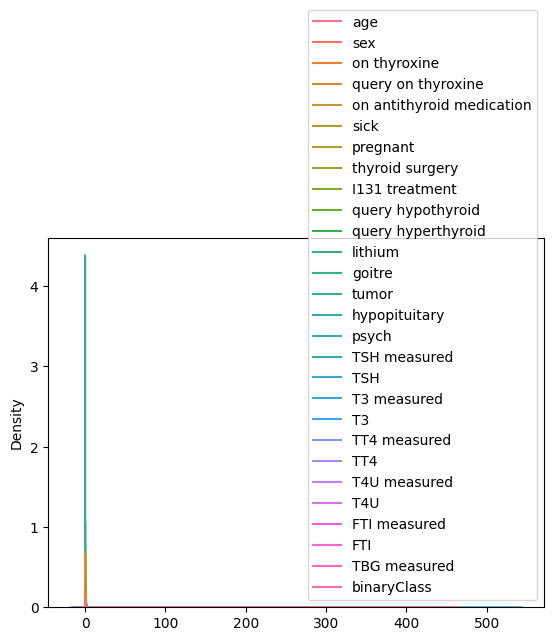

In [ ]:
#kernal density estimation
sns.kdeplot(data=project)
plt.show()

<Axes: xlabel='sick', ylabel='psych'>

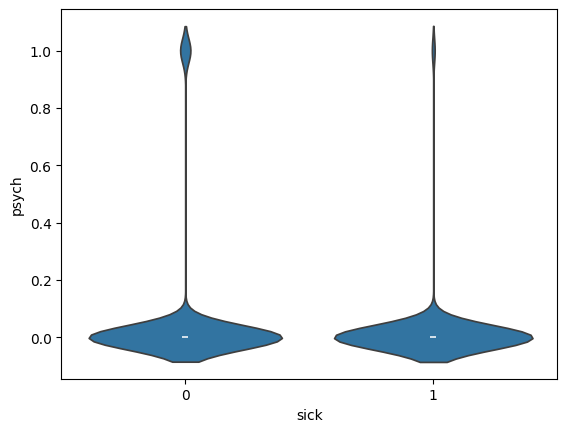

In [ ]:
#violin plot
sns.violinplot(x='sick',y='psych',data=project)

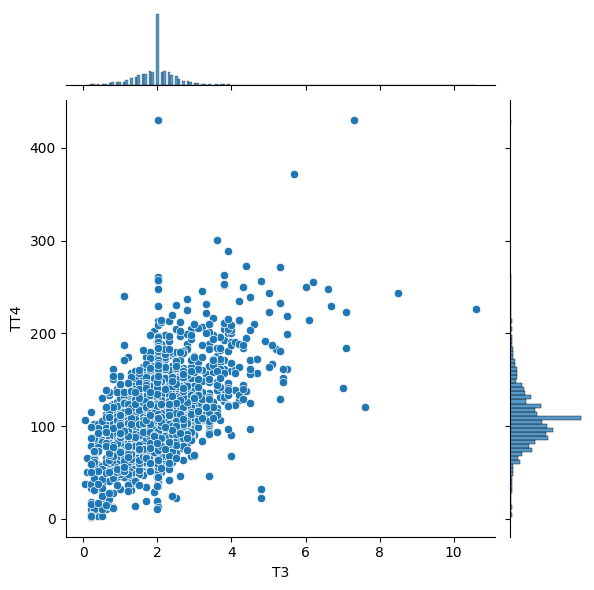

In [ ]:
#joint plot
sns.jointplot(x='T3',y='TT4',data=project)
plt.show()

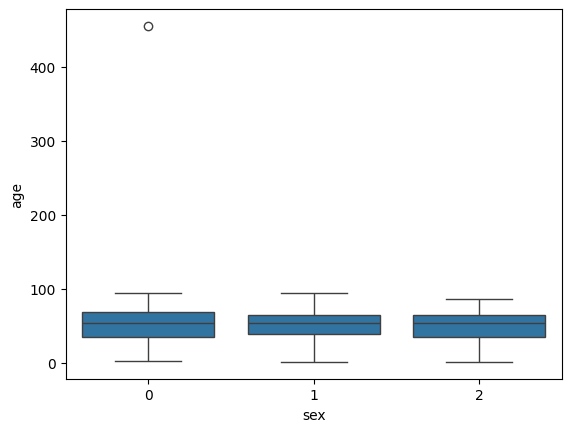

In [ ]:
#box plot
sns.boxplot(x='sex',y='age',data=project)
plt.show()

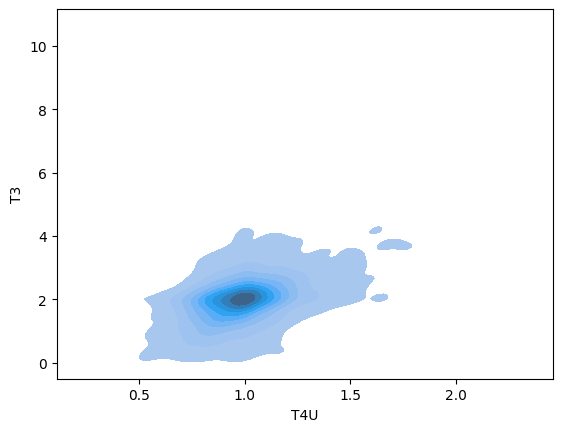

In [ ]:
#contour plot
sns.kdeplot(x='T4U',y='T3',data=project,fill=True)
plt.show()

In [30]:

X.drop("TBG measured",axis=1,inplace=True)


In [31]:
#datatypes of the dataset
project.dtypes

age                          float64
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [32]:
project.dtypes

age                          float64
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [33]:
project.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [34]:
project.dtypes

age                          float64
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [35]:
import mrmr
from mrmr import mrmr_classif
selected_features = mrmr_classif(X, Y, K=15)

print("Selected features:", selected_features)

100%|██████████| 15/15 [00:00<00:00, 58.64it/s]

Selected features: ['TSH', 'TSH measured', 'FTI', 'TT4', 'query hypothyroid', 'T3', 'on thyroxine', 'sex', 'goitre', 'TT4 measured', 'pregnant', 'psych', 'on antithyroid medication', 'thyroid surgery', 'T3 measured']


In [36]:
x_sel= project[selected_features]

In [37]:
x=x_sel


In [38]:
y=Y

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x,y)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
binaryClass
1    3481
0     291
Name: count, dtype: int64

Class distribution after SMOTE:
binaryClass
1    3481
0    3481
Name: count, dtype: int64


In [40]:
X_resampled

,TSH,TSH measured,FTI,TT4,query hypothyroid,T3,on thyroxine,sex,goitre,TT4 measured,pregnant,psych,on antithyroid medication,thyroid surgery,T3 measured
0,1.300000,1,109.000000,125.000000,0,2.500000,0,0,0,1,0,0,0,0,1
1,4.100000,1,110.469649,102.000000,0,2.000000,0,0,0,1,0,0,0,0,1
2,0.980000,1,120.000000,109.000000,0,2.013500,0,1,0,1,0,0,0,0,0
3,0.160000,1,110.469649,175.000000,0,1.900000,1,0,0,1,0,0,0,0,1
4,0.720000,1,70.000000,61.000000,0,1.200000,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,12.000000,1,120.089802,105.491020,0,1.347306,0,0,0,1,0,0,0,0,1
6958,44.962201,1,57.320734,56.754865,0,1.507560,0,0,0,1,0,0,0,0,1
6959,9.415225,1,129.846452,111.461937,0,1.765419,0,1,0,1,0,0,0,0,1
6960,145.475756,1,61.787505,63.406444,0,0.916629,0,0,0,1,0,0,0,0,1


In [41]:
y_resampled

0       1
1       1
2       1
3       1
4       1
       ..
6957    0
6958    0
6959    0
6960    0
6961    0
Name: binaryClass, Length: 6962, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

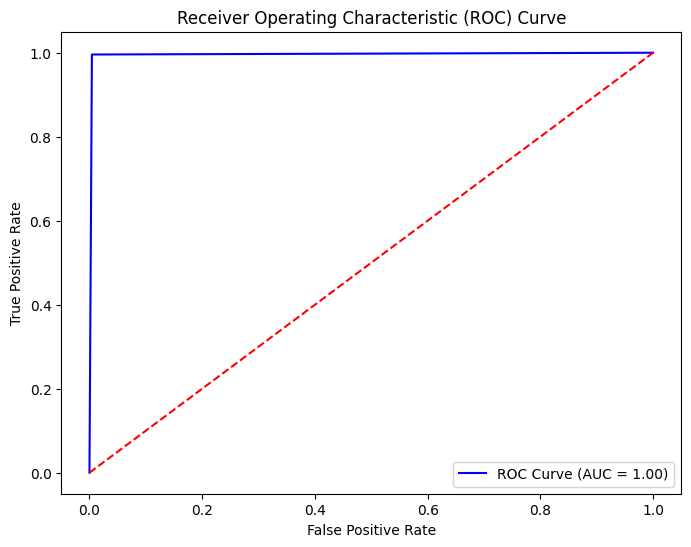

Accuracy: 0.9956927494615937
Precision: 0.9957446808510638
Recall (Sensitivity): 0.9957446808510638
F1 Score: 0.9957446808510638
Specificity: 0.9956395348837209
Confusion Matrix:
[[685   3]
 [  3 702]]
Time taken: 0.2120828628540039


In [44]:
import xgboost as xgb
import time
X_train, X_test, y_train, y_test = train_test_split(X_resampled.values, y_resampled.values, test_size=0.2, random_state=42)
s = time.time()
xgb_model = xgb.XGBClassifier(n_estimators=100,random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
e = time.time()

metrics(y_test,y_pred)
print("Time taken:", e - s)

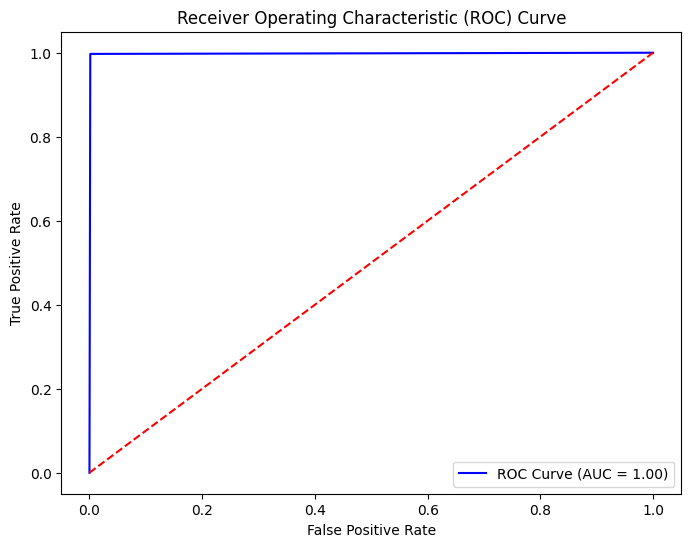

Accuracy: 0.9978463747307968
Precision: 0.9985795454545454
Recall (Sensitivity): 0.9971631205673759
F1 Score: 0.9978708303761533
Specificity: 0.998546511627907
Confusion Matrix:
[[687   1]
 [  2 703]]
Time taken: 0.2634248733520508


In [47]:
import time

X_train, X_test, y_train, y_test = train_test_split(X_resampled.values, y_resampled.values, test_size=0.2, random_state=42)
s = time.time()
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Time taken:", e - s)

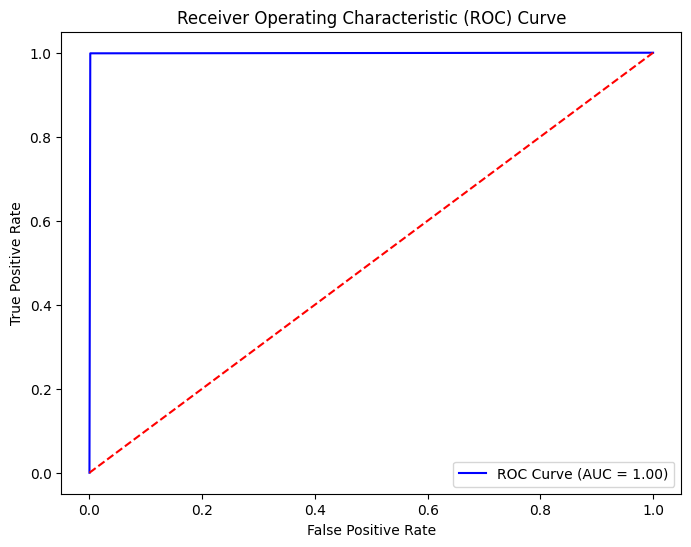

Accuracy: 0.9985642498205313
Precision: 0.9985815602836879
Recall (Sensitivity): 0.9985815602836879
F1 Score: 0.9985815602836879
Specificity: 0.998546511627907
Confusion Matrix:
[[687   1]
 [  1 704]]
Time taken: 0.01744985580444336


In [48]:
import time
X_train, X_test, y_train, y_test = train_test_split(X_resampled.values, y_resampled.values, test_size=0.2, random_state=42)
s = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Time taken:", e - s)

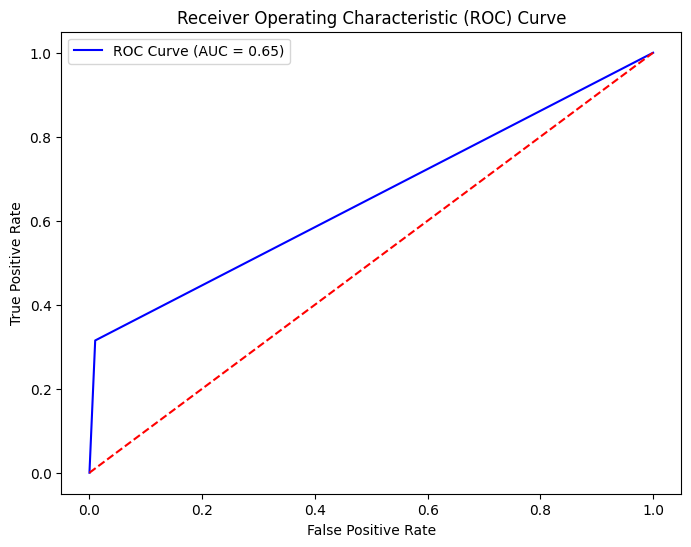

Accuracy: 0.6482412060301508
Precision: 0.9694323144104804
Recall (Sensitivity): 0.3148936170212766
F1 Score: 0.4753747323340471
Specificity: 0.9898255813953488
Confusion Matrix:
[[681   7]
 [483 222]]
Time taken: 0.0023651123046875


In [51]:
import time
X_train, X_test, y_train, y_test = train_test_split(X_resampled.values, y_resampled.values, test_size=0.2, random_state=42)
s = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Time taken:", e - s)

In [52]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
smote_enn = SMOTEENN()
X_res1, y_res1 = smote_enn.fit_resample(x, y)
X_res1.shape, y_res1.shape
y_res1.value_counts()

binaryClass
0    3440
1    3315
Name: count, dtype: int64

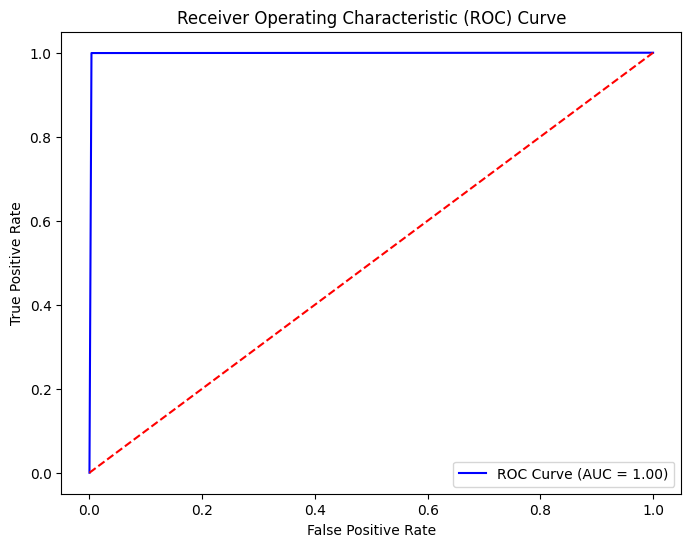

Accuracy: 0.997779422649889
Precision: 0.9961597542242704
Recall (Sensitivity): 0.9992295839753467
F1 Score: 0.9976923076923077
Specificity: 0.9964387464387464
Confusion Matrix:
[[1399    5]
 [   1 1297]]
Decision Trees Time taken: 0.008251190185546875


In [53]:
# Decision Trees
X_train, X_test, y_train, y_test = train_test_split(X_res1.values, y_res1.values, test_size=0.4, random_state=42)
s = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Decision Trees Time taken:", e - s)

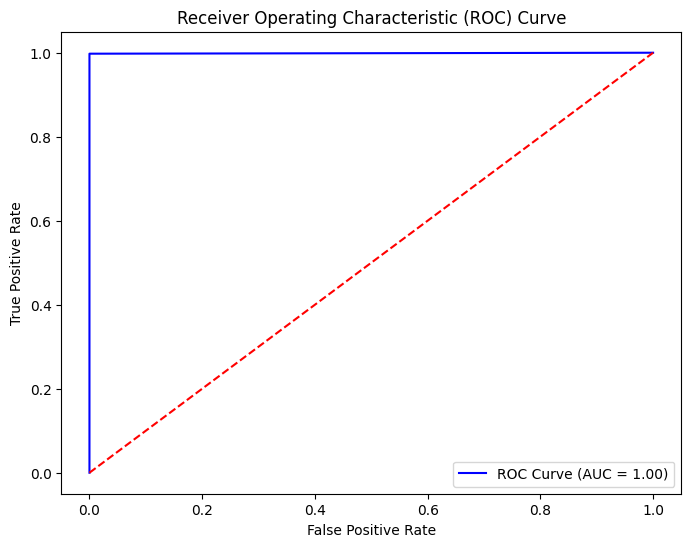

Accuracy: 0.9988897113249445
Precision: 1.0
Recall (Sensitivity): 0.99768875192604
F1 Score: 0.998843038951022
Specificity: 1.0
Confusion Matrix:
[[1404    0]
 [   3 1295]]
Random Forest Time taken: 0.16369414329528809


In [54]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_res1.values, y_res1.values, test_size=0.4, random_state=42)
s = time.time()
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Random Forest Time taken:", e - s)

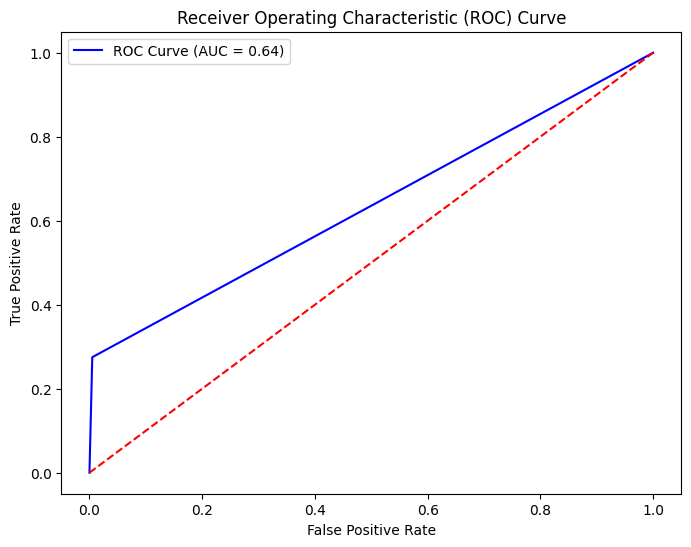

Accuracy: 0.6491487786824575
Precision: 0.9807692307692307
Recall (Sensitivity): 0.27503852080123264
F1 Score: 0.4296028880866426
Specificity: 0.9950142450142451
Confusion Matrix:
[[1397    7]
 [ 941  357]]
Naive Bayes Time taken: 0.0031371116638183594


In [55]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X_res1.values, y_res1.values, test_size=0.4, random_state=42)
s = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Naive Bayes Time taken:", e - s)

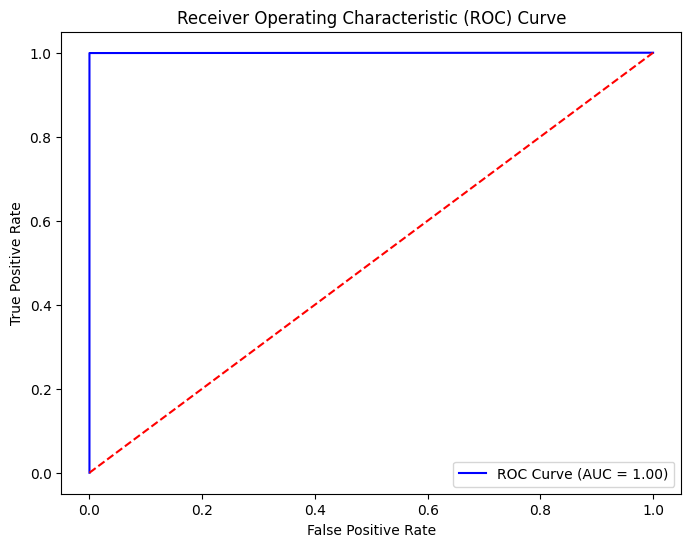

Accuracy: 0.9996299037749815
Precision: 1.0
Recall (Sensitivity): 0.9992295839753467
F1 Score: 0.9996146435452794
Specificity: 1.0
Confusion Matrix:
[[1404    0]
 [   1 1297]]
XGBoost Time taken: 0.0637362003326416


In [56]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X_res1.values, y_res1.values, test_size=0.4, random_state=42)
s = time.time()
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("XGBoost Time taken:", e - s)

In [58]:
from imblearn.combine import SMOTETomek
Yes = project[project['binaryClass']==1]
No = project[project['binaryClass']==0]
Yes.shape,No.shape
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(x,y)
X_res.shape, y_res.shape
y_res.value_counts()

binaryClass
1    3472
0    3472
Name: count, dtype: int64

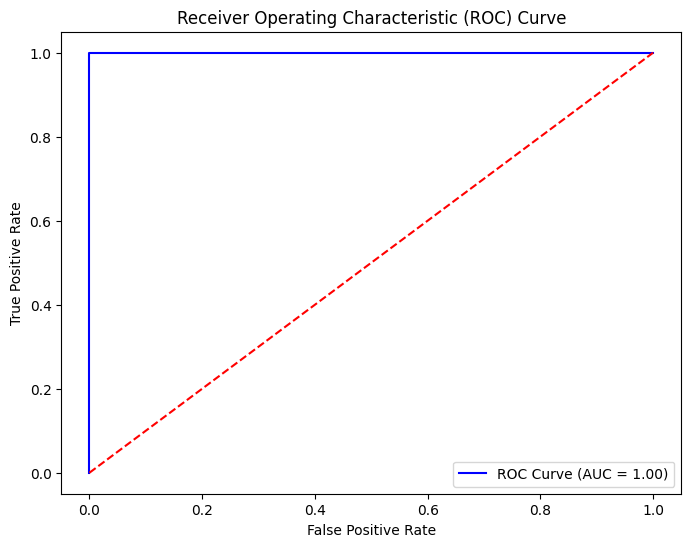

Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1 Score: 1.0
Specificity: 1.0
Confusion Matrix:
[[662   0]
 [  0 727]]
Decision Trees Time taken: 0.016434907913208008


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_res.values, y_res.values, test_size=0.2, random_state=42)
s = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Decision Trees Time taken:", e - s)

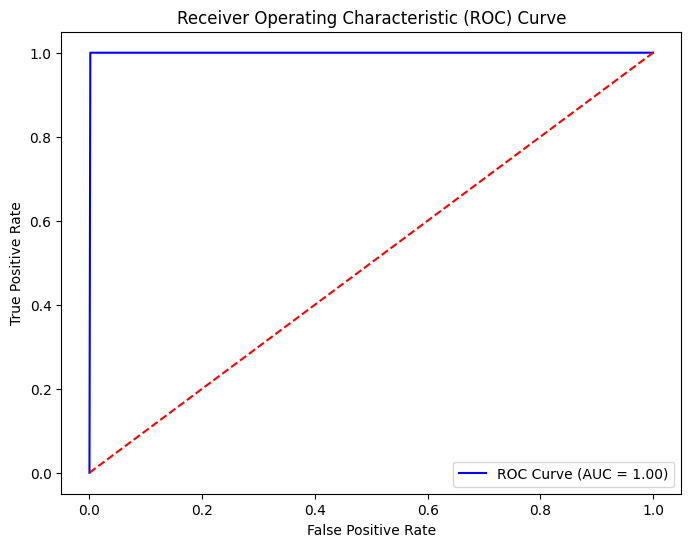

Accuracy: 0.9992800575953924
Precision: 0.9986263736263736
Recall (Sensitivity): 1.0
F1 Score: 0.9993127147766323
Specificity: 0.9984894259818731
Confusion Matrix:
[[661   1]
 [  0 727]]
Random Forest Time taken: 1.0549521446228027


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_res.values, y_res.values, test_size=0.2, random_state=42)
s = time.time()
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("Random Forest Time taken:", e - s)

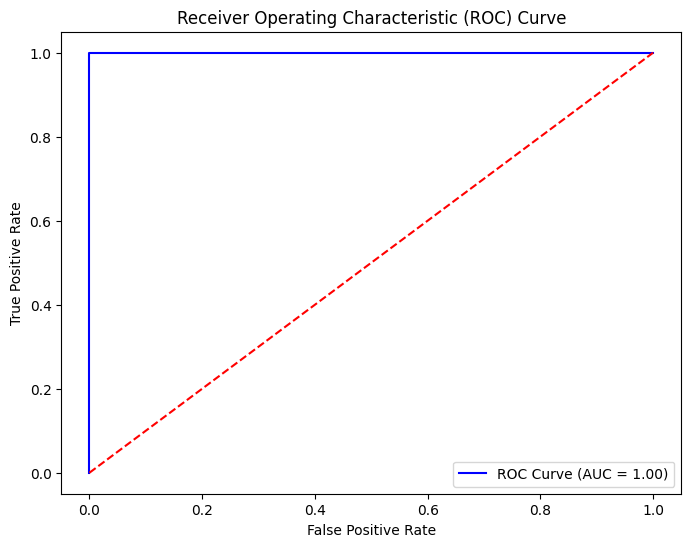

Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1 Score: 1.0
Specificity: 1.0
Confusion Matrix:
[[662   0]
 [  0 727]]
XGBoost Time taken: 0.07328486442565918


In [61]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X_res.values, y_res.values, test_size=0.2, random_state=42)
s = time.time()
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
e = time.time()
metrics(y_test,y_pred)
print("XGBoost Time taken:", e - s)